In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


Using TensorFlow backend.


In [2]:
import numpy as np


def vectorize_sequence(sequence, dimension=10000):
    result = np.zeros((len(sequence), dimension))
    for i, sequence in enumerate(sequence):
        result[i, sequence] = 1
    return result


x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)


In [3]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [7]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [8]:
from keras import losses, optimizers, metrics

model.compile(optimizer=optimizers.nadam,
              loss=losses.mse,
              metrics=[metrics.binary_accuracy])


ValueError: Could not interpret optimizer identifier: <class 'keras.optimizers.Nadam'>

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [7]:
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=1024,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 165us/step - loss: 0.5083 - binary_accuracy: 0.7809 - val_loss: 0.3796 - val_binary_accuracy: 0.8686
Epoch 2/4
15000/15000 [==============================] - 2s 125us/step - loss: 0.3005 - binary_accuracy: 0.9045 - val_loss: 0.3001 - val_binary_accuracy: 0.8899
Epoch 3/4
15000/15000 [==============================] - 2s 126us/step - loss: 0.2179 - binary_accuracy: 0.9279 - val_loss: 0.3078 - val_binary_accuracy: 0.8722
Epoch 4/4
15000/15000 [==============================] - 2s 127us/step - loss: 0.1750 - binary_accuracy: 0.9435 - val_loss: 0.2842 - val_binary_accuracy: 0.8834


In [8]:
history_dict = history.history
history_dict.keys()


['loss', 'val_binary_accuracy', 'val_loss', 'binary_accuracy']

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

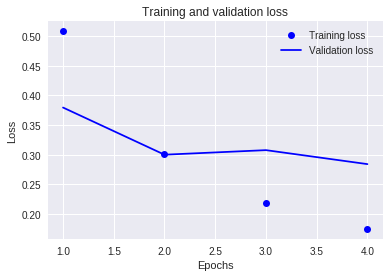

In [10]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


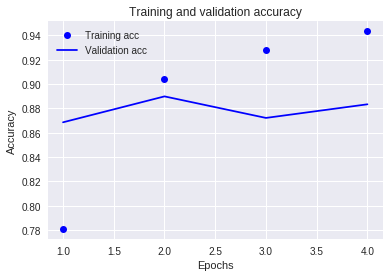

In [11]:
plt.clf()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [12]:
results = model.evaluate(x_test, y_test)


25000/25000 [==============================] - 2s 83us/step


In [13]:
results

[0.30727137032032015, 0.87464]

In [14]:
model.predict(x_test)

array([[0.23256522],
       [0.9974476 ],
       [0.77904   ],
       ...,
       [0.08958707],
       [0.10289306],
       [0.3523987 ]], dtype=float32)